## Related Blog Post
[Blog Post #2](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline


# Load in final dataset, set index
df_final_data = pd.read_csv('kc_housing_model_df_final_data.csv')
df_final_data.set_index('id')
df_final_data.drop(['id','Unnamed: 0','lat','long'],axis=1,inplace=True)

cat_vars = ['zipcode','is_reno']
for var in cat_vars:
    df_final_data[var] = df_final_data[var].astype('category')
# df_final_data.fin()
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price                    19053 non-null float64
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null float64
floors                   19053 non-null float64
condition                19053 non-null float64
grade                    19053 non-null float64
zipcode                  19053 non-null category
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null float64
code_view                19053 non-null float64
code_waterfront          19053 non-null float64
is_reno                  19053 non-null category
bins_yrbuilt             19053 non-null object
bins_sqftbasement        19053 non-null object
bins_sqftabove           19053 non-null object
sca_sqft_living          19053 non-null float64
sca_sqft_lot             190

In [2]:
# Select columns that do not contain strings 'sca' (scaled), 'code' (coded) 
df_final_data =df_final_data.loc[:,~(df_final_data.columns.str.startswith(('sca','code')))]

df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price                19053 non-null float64
bedrooms             19053 non-null float64
bathrooms            19053 non-null float64
sqft_living          19053 non-null float64
sqft_lot             19053 non-null float64
floors               19053 non-null float64
condition            19053 non-null float64
grade                19053 non-null float64
zipcode              19053 non-null category
sqft_living15        19053 non-null float64
sqft_lot15           19053 non-null float64
is_reno              19053 non-null category
bins_yrbuilt         19053 non-null object
bins_sqftbasement    19053 non-null object
bins_sqftabove       19053 non-null object
dtypes: category(2), float64(10), object(3)
memory usage: 2.2+ MB


In [3]:
df_final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,sqft_living15,sqft_lot15,is_reno,bins_yrbuilt,bins_sqftbasement,bins_sqftabove
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,98178.0,1340.0,5650.0,0.0,"(1950.0, 1960.0]","(-inf, 1.0]","(1000.0, 1500.0]"
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,7.0,98125.0,1690.0,7639.0,1.0,"(1950.0, 1960.0]","(1.0, 501.0]","(2000.0, 2500.0]"
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6.0,98028.0,2720.0,8062.0,0.0,"(1930.0, 1940.0]","(-inf, 1.0]","(500.0, 1000.0]"
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7.0,98136.0,1360.0,5000.0,0.0,"(1960.0, 1970.0]","(501.0, 1001.0]","(1000.0, 1500.0]"
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8.0,98074.0,1800.0,7503.0,0.0,"(1980.0, 1990.0]","(-inf, 1.0]","(1500.0, 2000.0]"


In [4]:
df_final_data.isna().sum()

price                2544
bedrooms             2544
bathrooms            2544
sqft_living          2544
sqft_lot             2544
floors               2544
condition            2544
grade                2544
zipcode              2544
sqft_living15        2544
sqft_lot15           2544
is_reno              2544
bins_yrbuilt         2544
bins_sqftbasement    2544
bins_sqftabove       2544
dtype: int64

In [5]:
df_final_data.dropna(inplace=True)
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 15 columns):
price                19053 non-null float64
bedrooms             19053 non-null float64
bathrooms            19053 non-null float64
sqft_living          19053 non-null float64
sqft_lot             19053 non-null float64
floors               19053 non-null float64
condition            19053 non-null float64
grade                19053 non-null float64
zipcode              19053 non-null category
sqft_living15        19053 non-null float64
sqft_lot15           19053 non-null float64
is_reno              19053 non-null category
bins_yrbuilt         19053 non-null object
bins_sqftbasement    19053 non-null object
bins_sqftabove       19053 non-null object
dtypes: category(2), float64(10), object(3)
memory usage: 2.1+ MB


___

## HIstogram Scatterplot Subplots


In [17]:
#SEABORN
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df,target='price'):
    
    
    ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
    # Axis Label fonts
    fontTitle = {'fontsize': 16,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontAxis = {'fontsize': 14,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontTicks = {'fontsize': 12,
               'fontweight':'bold',
                'fontfamily':'serif'}

    # Formatting dollar sign labels
    fmtPrice = '${x:,.0f}'
    tickPrice = mtick.StrMethodFormatter(fmtPrice)
    

    ## ----------- PLOTTING ----------- ##
    
    ## Loop through dataframe to plot
    for column in df.describe():
    
        # Create figure with subplots for current column
        # Note: in order to use identical syntax for large # of subplots (ax[i,j]), 
        #  declare an extra row of subplots to be removed later
        fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)

        ## ----- SUBPLOT 1 -----##
        i,j = 0,0
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)
        
        # Define graphing keyword dictionaries for distplot (Subplot 1)
        hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
        kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}
        
        # Plot distplot on ax[i,j] using hist_kws and kde_kws
        sns.distplot(df[column], norm_hist=True, kde=True,
                     hist_kws = hist_kws, kde_kws = kde_kws,
                     label=column+' histogram', ax=ax[i,j])
 

        # Set x axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)
    
        # Get x-ticks, rotate labels, and return
        xticklab1 = ax[i,j].get_xticklabels(which = 'both')
        ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        
        # Set y-label 
        ax[i,j].set_ylabel('Density',fontdict=fontAxis)
        yticklab1=ax[i,j].get_yticklabels(which='both')
        ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
        ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())
        
        
        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')

        
        ## ----- SUBPLOT 2-----  ##
        i,j = 0,1
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

        # Define the ketword dictionaries for  scatter plot and regression line (subplot 2)
        line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
        scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

        # Plot regplot on ax[i,j] using line_kws and scatter_kws
        sns.regplot(df[column], df[target], 
                    line_kws = line_kws,
                    scatter_kws = scatter_kws,
                    ax=ax[i,j])
        
        # Set x-axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

         # Get x ticks, rotate labels, and return
        xticklab2=ax[i,j].get_xticklabels(which='both')
        ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        # Set  y-axis label
        ax[i,j].set_ylabel('Price',fontdict=fontAxis)
        
        # Get, set, and format y-axis Price labels
        yticklab = ax[i,j].get_yticklabels()
        ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
        ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')       
        
        ## ---------- Final layout adjustments ----------- ##
        # Deleted unused subplots 
        fig.delaxes(ax[1,1])
        fig.delaxes(ax[1,0])

        # Optimizing spatial layout
        fig.tight_layout()
        figtitle=column+'_dist_regr_plots.png'
#         plt.savefig(figtitle)
    return 

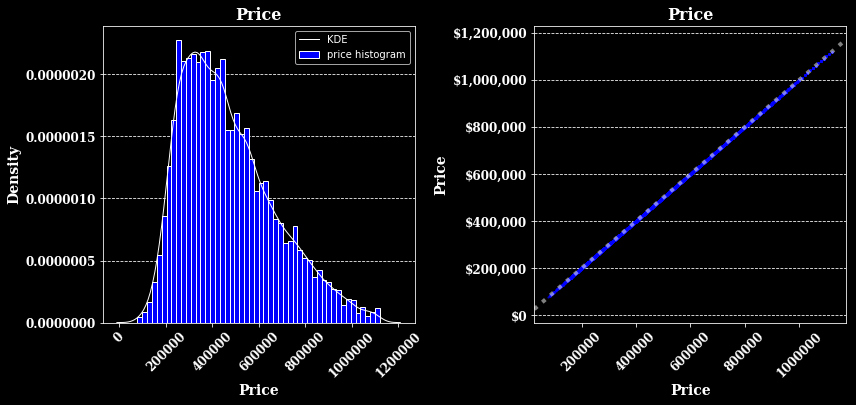

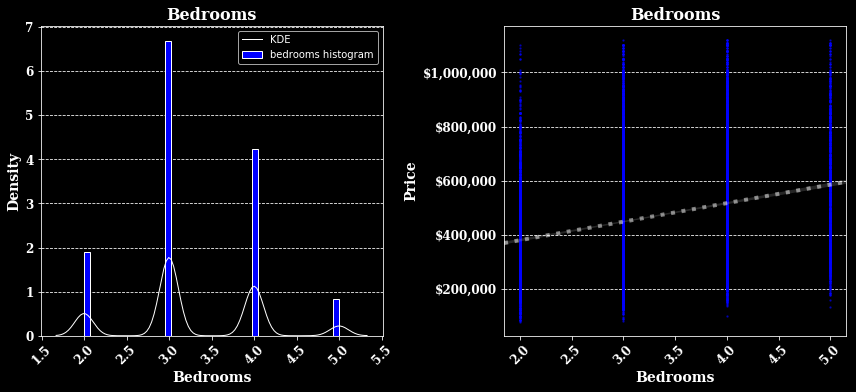

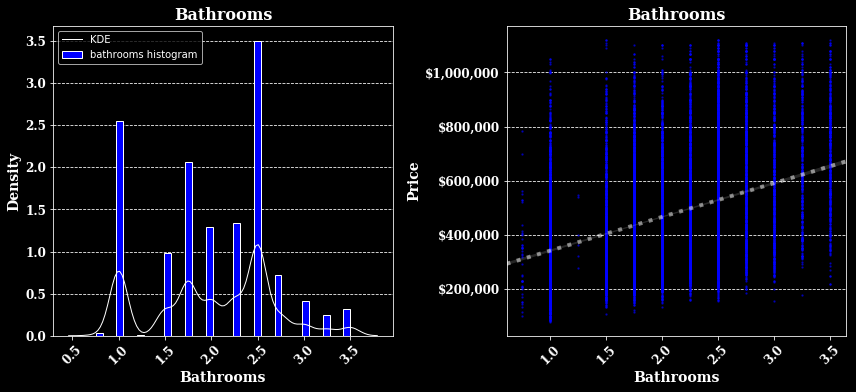

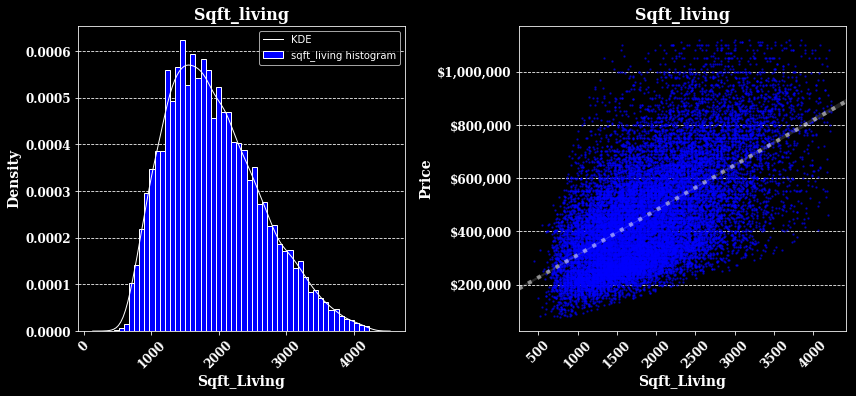

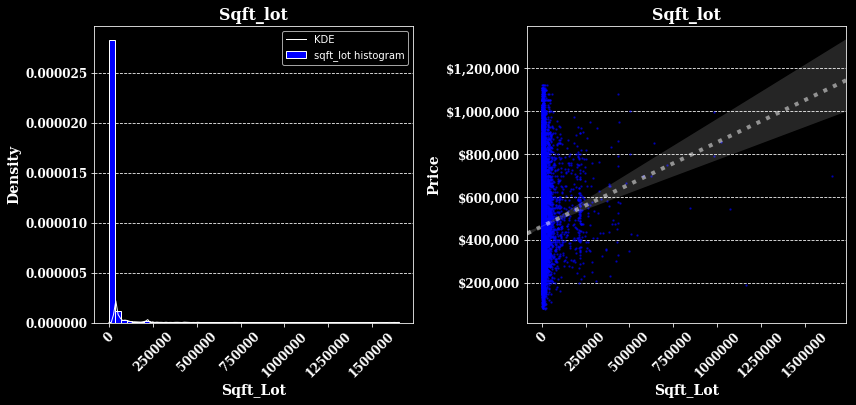

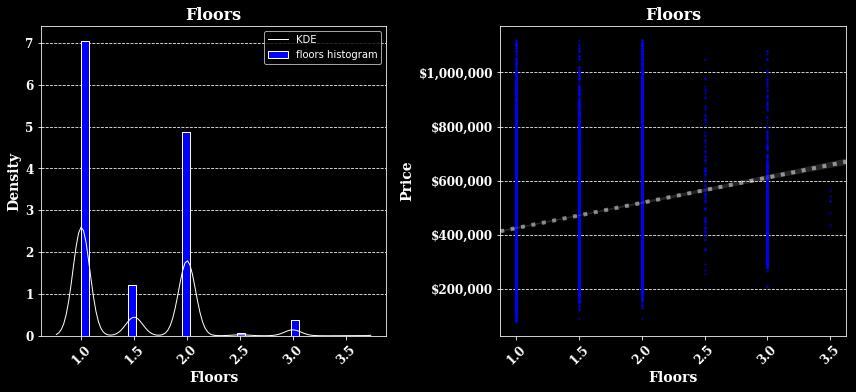

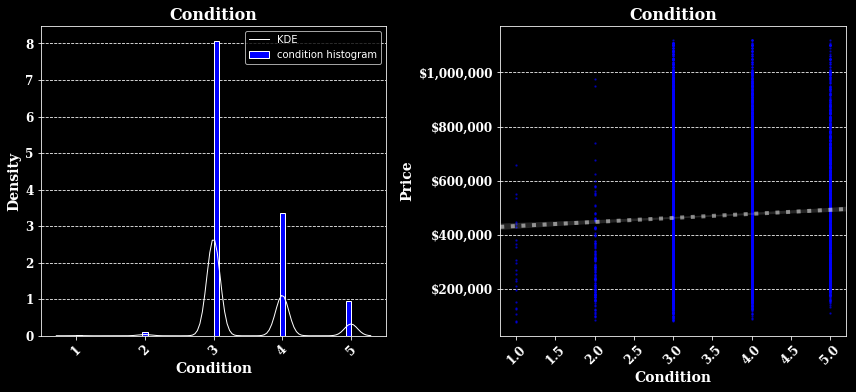

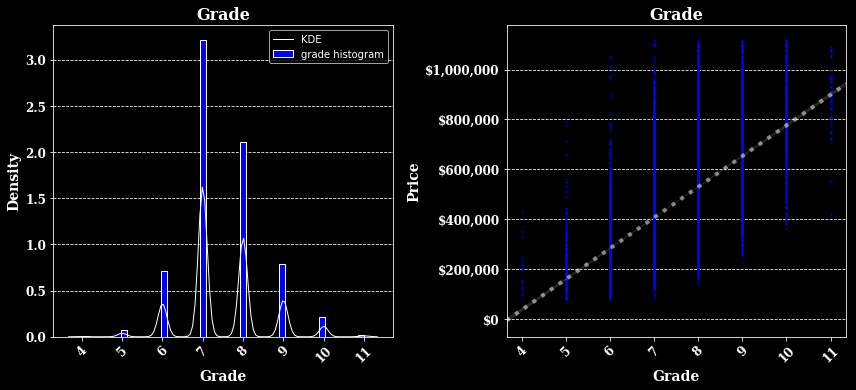

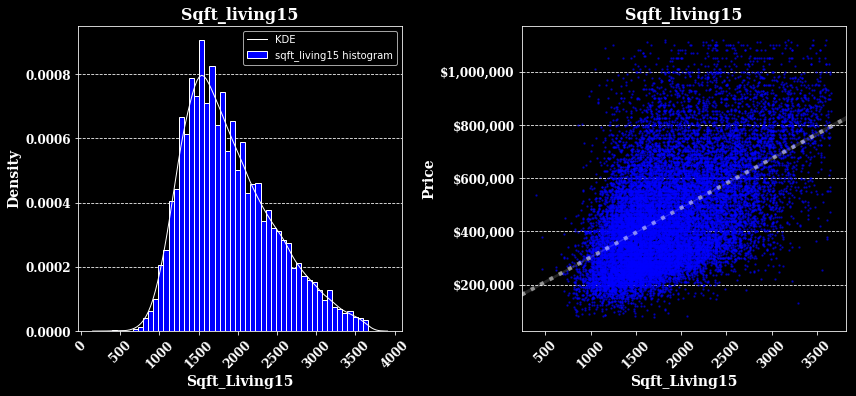

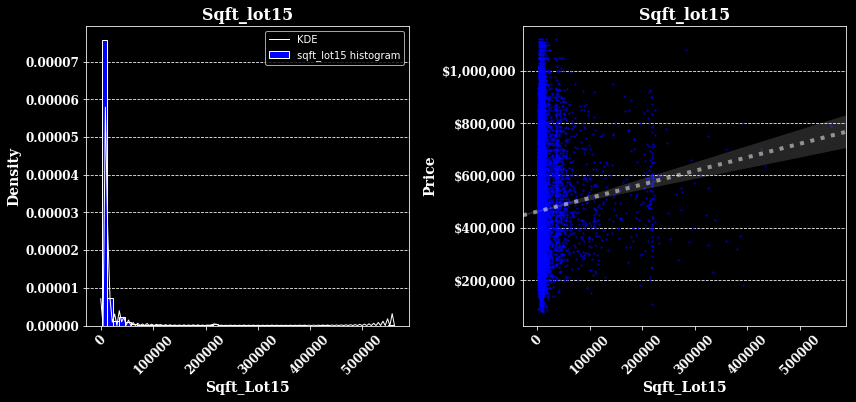

In [18]:
plot_hist_scat_sns(df_final_data)

## Summary Presentation Picture

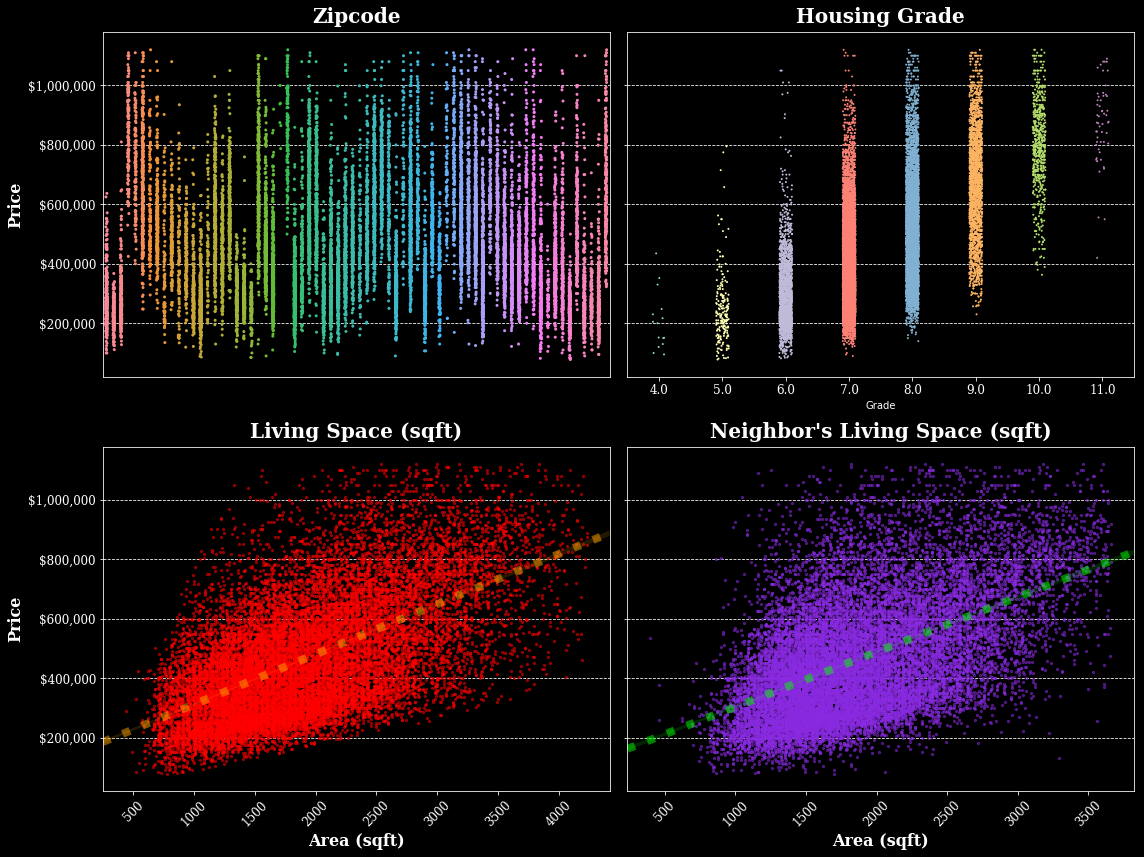

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('dark_background')

# Define the figure and axes and the # of subplots, sharing the y axes
fig, ax = plt.subplots(figsize=(16,12), ncols=2, nrows=2, sharey=True)

## Defining Formatting to be Used

# Formatting dollar sign labels
fmtPrice = '${x:,.0f}'
tickPrice = mtick.StrMethodFormatter(fmtPrice)

# Axis Label fonts
fontTitle = {'fontsize': 20,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontAxis = {'fontsize': 16,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontTicks = {'fontsize': 12,
           'fontweight':'medium',
            'fontfamily':'serif'}

# The amount of space above titles
y_title_margin = 1.01

# Major title
# plt.suptitle("Critical Factors for Predicting Sales Price", y = 1.0, fontdict=fontTitle, fontsize=22)


## Subplot 1
i,j=0,0
ax[i,j].set_title("Zipcode",y = y_title_margin,fontdict=fontTitle)#, y = y_title_margin)
sns.stripplot(df_final_data['zipcode'],df_final_data['price'],ax=ax[i,j],marker='o',size=3)

# Remove xticks
ax[i,j].set_xticks([]), ax[i,j].set_xlabel('')

# Change y-tick labels
ax[i,j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice)

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')



## Subplot 2
i,j = 0,1
ax[i,j].set_title("Housing Grade",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)
sns.stripplot(df_final_data['grade'],df_final_data['price'],ax=ax[i,j],marker='o',size=2)

#Set x axis
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks)
ax[i,j].set_xlabel('Grade')


# Change y-tick labels
ax[i,j].set_ylabel('')# 'Price',fontdict=fontAxis)

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')


yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice) 


## Subplot 3
i,j = 1,0

# Title
ax[i,j].set_title("Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)

# Define the scatter plot and line graph aesthetics
line_kws={"color":"orange","alpha":0.5,"lw":8,"ls":":"}
scatter_kws={'s': 5, 'alpha': 0.5,'marker':'.','color':'red'}


# Plot seaborn plot 
sns.regplot(df_final_data['sqft_living'], df_final_data['price'],ax=ax[i,j], scatter_kws=scatter_kws, line_kws=line_kws) #,marker='o',size=2) 
# sns.stripplot(df_final_data['sqft_living'], df_final_data['price'],ax=ax[i,j],marker='.') #,marker='o',size=2)


## Change the x-axis 
ax[i,j].set_xlabel('Area (sqft)',fontdict=fontAxis)



# Get ticks, rotate labels, and return
# xticks = ax[i,j].get_xticks()
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

# Change the major units of x-axis
ax[i,j].xaxis.set_major_locator(mtick.MultipleLocator(500))
ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

## Change y-axis
# Change y-tick labels
ax[i,j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')



# ## Subplot 4
i,j = 1,1
ax[i,j].set_title("Neighbor's Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)

# Define the scatter plot and line graph aesthetics
line_kws={"color":"lime","alpha":0.5,"lw":8,"ls":":"}
scatter_kws={'s': 5, 'alpha': 0.5,'marker':'.','color':'blueviolet'}

# Plot seaborn plot 
sns.regplot(df_final_data['sqft_living15'], df_final_data['price'],ax=ax[i,j], scatter_kws=scatter_kws, line_kws=line_kws)

# Change the x-axis labels
ax[i,j].set_xlabel('Area (sqft)',fontdict=fontAxis)

# Get ticks, rotate labels, and return
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

# Change the major units of x-axis
ax[i,j].xaxis.set_major_locator(mtick.MultipleLocator(500))
ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

# Change y-tick labels
ax[i,j].set_ylabel('')#Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')

plt.tight_layout()
# plt.savefig("summary_figure.png") # save as png